# Imports

In [382]:
#Enable matplotlib to display in jupyter notebook & import it
%matplotlib inline

import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import re
from geopy.geocoders import Nominatim #used in filling missing zipcodes
import math


# Reading Files

In [383]:
#Read Files
#"originals" should never be modified.  They exist to check work.  They should be deleted in our final work
listings_original = pd.read_csv('data/listings.csv')
calendar_oiginal = pd.read_csv('data/calendar.csv')
reviews_original = pd.read_csv('data/reviews.csv')

listings = listings_original.copy()
calendar = calendar_oiginal.copy()
reviews = reviews_original.copy()

# #Final version should just have the code below
# listings = pd.read_csv('data/listings.csv')
# calendar = pd.read_csv('data/calendar.csv')
# reviews = pd.read_csv('data/reviews.csv')


# Clean the Data

## Listings Data

In [706]:
print('start')
#for testing
listings = listings_original.copy()

###remove hosts who have never responded to or received a message
#there are better ways to do this
#unused_listings = listings[listings.host_response_time.isnull()].copy()
#listings = listings[listings.host_response_time.notnull()]

#listings.columns[(listings.isnull().sum()==3585)]
#returns these (empty variables)
#Index(['neighbourhood_group_cleansed', 'has_availability', 'license','jurisdiction_names'],
      
      
# Description:  
# Original shape = (3585, 95)

# id
# Type: Float
# What: The listing id is a unique id # for each property being listed on airBnB
# Cleaning: SET AS INDEX

#listings.index = set_index('id', inplace=True) #this also sets index but doesn't leave me with id as a column
listings.index = listings.id.copy()

# listing_url
# Type: String
# What: Url in for the listing in the format: "https://www.airbnb.com/rooms/" + listing.id
# Cleaning: leave in for easy access to listings while exploring data

# scrape_id
# Type: int
# What: Identify which webscrape the data came from, all of Boston came from the same scrape: 20160906204935
#Cleaning: Delete.  Not relevant to our analysis
del(listings['scrape_id'])

# last_scraped
# Type: str
# What: The date that our data was scraped, it is the same for all of Boston entries: 2016-09-07
# Cleaning : Convert to date
listings.last_scraped = pd.to_datetime(listings.last_scraped)

# name
# Type: str
# What: This text is the "title" of any listing.  In a search result it would 
#       be the text that users see as the first description of a listing.  It
#       is also the title of the page for a listing in browser history. etc.
# Cleaning:  None
# Uses: keyword analysis
pass

# summary
# Type: str or NaN
# What: Prose that is displayed on listing webpage for "About this listing".
# Cleaning: Fill NaN with "" so that all types match
# Uses: Keyword analysis
pass
len(listings.summary.unique()) #=3114
listings.summary = listings.summary.fillna('')
listings.summary[listings.summary == ''].count() #=143
listings.summary.value_counts().index[1] #most common summary other than ""
listings[listings.summary == listings.summary.value_counts().index[1]]
#more exploration of duplicates needed


# space
# Type: str or NaN
# What: [OPTIONAL] Prose to describe the inside space of a listing
# Cleaning: Fill NaN with "" so that all types match
listings.space.isnull().any()
len(listings.space.unique()) #=2269
listings.space = listings.space.fillna('')
listings.space[listings.space == ''].count() #=1057
listings.space.value_counts()
#more exploration of duplicates needed

# description
# Type: str
# What: Prose that contains the first 1000 characters of the merging of other descriptive prose:
#     summary
#     space
#     experiences_offered
#     neighborhood_overview
#     notes
#     transit
#     access
#     interaction
#     house_rules
# Cleaning: Delete.  the fact that it only gives us the first 1000 characters makes it unuseful.
del(listings['description'])

# experiences_offered
# Type: str
# What: 'none' for every entry
# Cleaning: Delete
del(listings['experiences_offered'])

# neighborhood_overview
# Type: str or NaN
# What: [OPTIONAL] description by host of the neighborhood 
# Cleaning: Fill NaN with "" so that all types match
listings.neighborhood_overview.isnull().sum() #=1415
len(listings.neighborhood_overview.unique()) #=1729
listings.neighborhood_overview = listings.neighborhood_overview.fillna('')
#more exploration of duplicates needed

# notes
# Type: str or NaN
# What: [OPTIONAL] under "Other things to note" in the description on webpage
# Cleaning: Fill NaN with "" so that all types match
listings.notes.isnull().sum() #=1975
listings.notes = listings.notes.fillna('')
len(listings.notes.unique()) #=1270
#more exploration of duplicates needed


# transit
# Type: str or NaN
# What: [OPTIONAL] under "Getting around" in the description on webpage
# Cleaning: Fill NaN with "" so that all types match
listings.transit.isnull().sum()
listings.transit = listings.transit.fillna('')
len(listings.transit.unique())
#more exploration of duplicates needed


# access
# Type: str or NaN
# What: [OPTIONAL] under "Guest access" in the description on webpage
# Cleaning: Fill NaN with "" so that all types match
listings.access.isnull().sum() #=1489
listings.access = listings.access.fillna('') 
len(listings.access.unique()) #=1763
#more exploration of duplicates needed


# interaction
# Type: str or NaN
# What: [OPTIONAL] under "Interaction with guests" in the description on webpage
# Cleaning: Fill NaN with "" so that all types match
listings.interaction.isnull().sum() #=1554
listings.interaction = listings.interaction.fillna('') 
len(listings.interaction.unique()) #=1618
#more exploration of duplicates needed


# house_rules
# Type: str or NaN
# What: [OPTIONAL] under "Interaction with guests" in the description on webpage
# Cleaning: Fill NaN with "" so that all types match
listings.house_rules.isnull().sum() #=1192
listings.house_rules = listings.house_rules.fillna('') 
len(listings.house_rules.unique()) #=1929



# thumbnail_url
# medium_url
# picture_url
# xl_picture_url
# Type: str or NaN
# What: URL to different image resourses
# Cleaning: Delete
del(listings['thumbnail_url'])
del(listings['medium_url'])
del(listings['picture_url'])
del(listings['xl_picture_url'])

# host_id
# Type: int
# What: The listing id is a unique id # for each host on airbnb
# Cleaning: None
# host_url
# Cleaning: Delete
del(listings['host_url'])


# host_name
# Type: str
# What: Host first name only
# Cleaning: append the user id to each host_Name to distinguish between people with the same name
listings['host_name'] = listings['host_name'] + ' ' + str(listings['host_id'])
#listings.host_name.value_counts()

# host_since
# Type: str
# What:
# Cleaning: convert to date
listings.host_since = pd.to_datetime(listings.host_since)

# host_location
# Type: str
# What: Location that the host lives in
# Cleaning: delete (data is not consistent enough to be relevant, perhaps could be cleaned in the future)
del listings['host_location']


# host_about
# Type: Str or Nan
# What: Prose.  Host description of themselves.
# Cleaning: replace NaN with '' so all types match (str)
listings.host_about.isnull().sum() #1309
listings.host_about = listings.host_about.fillna('') 
len(listings.host_about.unique()) #=1241

# host_response_time
# Type: Str or NaN  [nan, 'within an hour', 'within a few hours', 'within a day', 'a few days or more']
# What: A value, (probably generated automatically by AirBnB) to indicate how long a message is replied to.
listings.host_response_time.isnull().sum() #471
listings.host_response_time = listings.host_response_time.fillna('') 

# host_response_rate
# Type: Str (in the form '<0-100>%' or NaN
# What: the percent of messages that a host responds to
# cleaning: leave NaN, convert rest to decimal value (0.0-1.0)
listings.host_response_rate.isnull().sum() #471
(listings.host_response_rate == '0%').sum() #13
listings.host_response_rate = listings.host_response_rate.apply(lambda x: np.NaN if type(x) == float else int(x[:-1])/100)

# host_acceptance_rate
# Type: Str (in the form '<0-100>%' or NaN
# What: the percent of offers to rent a room that a host accepts
# cleaning: leave NaN, convert rest to decimal value (0.0-1.0)
listings.host_acceptance_rate.isnull().sum() #471
(listings.host_acceptance_rate == '0%').sum() #49
listings.host_acceptance_rate = listings.host_acceptance_rate.apply(lambda x: np.NaN if type(x) == float else int(x[:-1])/100)
#plt = listings.host_acceptance_rate.hist(bins = 20)
#plt.set_title('host_acceptance_rate')

# host_is_superhost
# Type: Str 't' or 'f'
# What: special designation AirBnB provides to host who meet qulifications.
#       more info at https://www.airbnb.com/superhost/terms
# cleaning: convert to boolean True or False
listings.host_is_superhost = listings.host_is_superhost.apply(lambda x: True if x == 't'else False)
listings.host_is_superhost.sum() #407 superhosts

# host_thumbnail_url
# Cleaning: Delete
del(listings['host_thumbnail_url'])

# host_picture_url
# Cleaning: Delete
del(listings['host_picture_url'])

# host_neighbourhood
# Type: Str or Nan
# What: Self reported neighborhood the host lives in.  not reliablie or useful
# Cleaning: delete
del listings['host_neighbourhood']

# host_listings_count
# Type: int
# What: The number of listings that the host has ACROSS ALL OF AIRBNB
# Related: If you want the number of listings that they have in this set, use calculated_host_listings_count

# host_total_listings_count
# Cleaning: Delete
(listings['host_total_listings_count'] == listings['host_listings_count']).all() #true
del(listings['host_total_listings_count'])

# host_verifications
###Unique Values:
##set([item for host in [re.sub(r"[\['\s\]]", '', host, 0).split(',') for host in listings.host_verifications.unique().tolist()] for item in host])
## {'amex',
##  'email',
##  'facebook',  
##  'google',
##  'jumio',
##  'kba',
##  'linkedin',
##  'manual_offline',
##  'manual_online',
##  'phone',
##  'reviews',
##  'sent_id',
##  'weibo'}
# cleaning: Delete
#del listings['host_verifications']

# host_has_profile_pic
# Cleaning: Delete, only 7 don't have a pic, also not relevant to our work
listings.host_has_profile_pic[listings.host_has_profile_pic == 'f'] #there were 7 listings
del(listings['host_has_profile_pic'])

# host_identity_verified
# Type: str ('t' or 'f')
# What: is the hosts identity verified
# Cleaning:
#listings.host_identity_verified.value_counts()  
        #t    2359
        #f     755
listings.host_identity_verified = listings.host_identity_verified == 't'
listings[listings.host_identity_verified == False].host_verifications
#this shows that there are some ways to partially verify a host identity without gaining "host_identity_verrified" status

# street
# Type: str (e.g. Pinehurst Street, Boston, MA 02131, United States) (not all are consistent format)
# What: street that the listing is on.
# Cleaning: delete
#listings.street.str.extract(r'^(.*?)[\s,]').value_counts()
del listings['street']


# neighbourhood
# Type: str 
# What: neighborhood the listing is in
# Cleaning: delete. neighbourhood_cleansed contains better data that matches neighbourhood.geojson (I think)
del listings['neighbourhood']
#n = listings[['neighbourhood','neighbourhood_cleansed']]
#n = n[(n['neighbourhood'] != n['neighbourhood_cleansed'])]
#n[(n['neighbourhood'] == n['neighbourhood'])]
#n.to_csv('neighbourhood_vs_neighbourhood_cleansed.csv')

# neighbourhood_cleansed
# Type: str 
# What: neighborhood the listing is in
# Cleaning: None needed

# neighbourhood_group_cleansed
# Cleaning: Delete, empty variable (all null)
del listings['neighbourhood_group_cleansed']


# city
# Type: str 
# What: City as reported by host.  Not SUPER consistent
# Cleaning: Delete, we have enough good location data from other variables.
del listings['city']

# state
# Type: str.  all values are 'MA'
# Cleaning: delete
del listings['state']

# zipcode
# Type: str or NaN
# What: Zipcode that the listing is in
# Cleaning: Fill in missing zipcodes usings the latitude and longitude.  Cut off anything past the 5th digit

# ###>>>this code has ben commented out because it is slow, uncomment it for fully cleaned data.
# def latlonToZip(lat, lon):
#     geolocator = Nominatim()
#     try:
#         location = geolocator.reverse(str(lat)+','+str(lon))
#         z = re.compile('(\s)([0-9]{5})(,\sUnited)')
#         #print(z.findall(location[0])[0][1])
#         return z.findall(location[0])[0][1]
#     except:
#         print(str(lat)+','+str(lon),'-----',location)
#         return np.nan
    
#     print(str(lat)+','+str(lon),'-----',location)
#     return np.nan
# temp = listings[listings.zipcode.isnull()].copy()
# listings.zipcode.update(temp.apply(lambda x: latlonToZip(x['latitude'], x['longitude']), axis=1))
# listings.zipcode = listings.zipcode.apply(lambda x: x[:5])

# market
# Cleaning: Delete
# listings.market[listings.market != 'Boston'] ######the results from this are very odd
del listings['market']


# smart_location
# Cleaning: Delete, not great data, redunant with 'city' and we have better data for location 
del listings['smart_location']

# country_code
# Cleaning: Delete
#(listings.country_code == listings.country_code[0]).all() #=True: 'US'
del listings['country_code']

# country
#(listings.country == listings.country[0]).all() #=True: 'United States'
del listings['country']

# latitude
listings.latitude


# longitude
######################################################################################################CollinToDO

# is_location_exact
######################################################################################################CollinToDO

# property_type
######################################################################################################CollinToDO

# room_type
######################################################################################################CollinToDO

# accommodates
######################################################################################################CollinToDO

# bathrooms
######################################################################################################CollinToDO

# bedrooms
######################################################################################################CollinToDO

# beds
######################################################################################################CollinToDO

# bed_type
######################################################################################################CollinToDO

# amenities
######################################################################################################CollinToDO


# square_feet
# Cleaning:  We may want to consider deleting this variable, only 56 entries have data
listings.square_feet.isnull().sum() #=3529
listings.square_feet = listings.square_feet.replace('[^0-9.]+','',regex=True).astype(float)

# price
#this regex "replaces" anything that is not a digit or a decimal with the empty string
#effectively removing anything that's not part of the number
listings.price = listings.price.replace('[^0-9.]+','',regex=True).astype(float)


# weekly_price
listings.weekly_price = listings.weekly_price.replace('[^0-9.]+','',regex=True).astype(float)
# monthly_price
listings.monthly_price = listings.monthly_price.replace('[^0-9.]+','',regex=True).astype(float)
# security_deposit
listings.security_deposit = listings.security_deposit.replace('[^0-9.]+','',regex=True).astype(float)
# cleaning_fee
listings.cleaning_fee = listings.cleaning_fee.replace('[^0-9.]+','',regex=True).astype(float)

# guests_included
######################################################################################################CollinToDO

# extra_people
######################################################################################################CollinToDO

# minimum_nights
######################################################################################################CollinToDO

# maximum_nights
######################################################################################################CollinToDO

# calendar_updated
######################################################################################################CollinToDO


# has_availability
# Cleaning: Delete, empty variable (all null)
del listings['has_availability']



# availability_30
######################################################################################################CollinToDO

# availability_60
######################################################################################################CollinToDO

# availability_90
######################################################################################################CollinToDO

# availability_365
######################################################################################################CollinToDO

# calendar_last_scraped
######################################################################################################CollinToDO

# number_of_reviews
######################################################################################################CollinToDO

# first_review
######################################################################################################CollinToDO

# last_review
######################################################################################################CollinToDO

# review_scores_rating
######################################################################################################CollinToDO

# review_scores_accuracy
######################################################################################################CollinToDO

# review_scores_cleanliness
######################################################################################################CollinToDO

# review_scores_checkin
######################################################################################################CollinToDO

# review_scores_communication
######################################################################################################CollinToDO

# review_scores_location
######################################################################################################CollinToDO

# review_scores_value
######################################################################################################CollinToDO

# requires_license
######################################################################################################CollinToDO

# license
# Cleaning: Delete, empty variable (all null)
del listings['license']

# jurisdiction_names
# Cleaning: Delete, empty variable (all null)
del listings['jurisdiction_names']

# instant_bookable
######################################################################################################CollinToDO

# cancellation_policy
######################################################################################################CollinToDO

# require_guest_profile_picture
######################################################################################################CollinToDO

# require_guest_phone_verification
######################################################################################################CollinToDO



# calculated_host_listings_count
# Type: int
# What: The number of listings that the host has THIS data set
# Related: If you want the number of th listings that the host has across ALL of airbnb
#          use host_listings_count
#listings.calculated_host_listings_count == listings.host_listings_count # not all true
#listings[['host_id','calculated_host_listings_count','host_listings_count']][listings.calculated_host_listings_count != listings.host_listings_count]



# reviews_per_month
######################################################################################################CollinToDO



#TO Do:
#delete all listings whose  host_response_time is null


listings_cleaned = listings.copy()
print('done')



start
done


In [707]:
#cleaning the listings.amenities and creating dummy variables
listings.amenities = listings.amenities.replace('[^\w,\s/]+','',regex=True).apply(lambda x: x.split(','))
amenities = list(set([item for item_list in listings.amenities for item in item_list]))
amenities.remove('translation missing enhosting_amenity_49')
amenities.remove('')

amn_frame = pd.DataFrame(index = listings.index)

for amn in amenities:
    amn_frame = amn_frame.join(listings.amenities.apply(lambda amns: amn in amns)).rename(columns={'amenities':amn})

In [611]:
listings['id'].shape

(3585,)

(3585, 69)

In [385]:
unused_listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
24,5498472,https://www.airbnb.com/rooms/5498472,20160906204935,2016-09-07,"4BD/3.5BA, Perfect for families!","Our spacious, modern, immaculate town home is ...","Our 2,400+ square foot home is a hidden gem, t...","Our spacious, modern, immaculate town home is ...",none,"Roslindale is a quiet and family friendly, yet...",...,10.0,f,NaN,NaN,f,moderate,f,f,1,0.07
32,14690527,https://www.airbnb.com/rooms/14690527,20160906204935,2016-09-07,1 Bedroom Home Suite Home,"My place is good for couples, solo adventurers...",NaN,"My place is good for couples, solo adventurers...",none,NaN,...,NaN,f,NaN,NaN,t,flexible,f,f,1,NaN
53,12535687,https://www.airbnb.com/rooms/12535687,20160906204935,2016-09-07,In-Law Apartment,"A private, comfortable and fully equipped in-l...",Open floor apartment. The living area has a so...,"A private, comfortable and fully equipped in-l...",none,"Quiet, safe, diverse neighborhood. Walking dis...",...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
59,735970,https://www.airbnb.com/rooms/735970,20160906204935,2016-09-07,Part of a Large Condo Jamaica Plain,"Bedroom, study and private bath in large condo...",A suite of private rooms -- bedroom with a que...,"Bedroom, study and private bath in large condo...",none,"The neighborhood is complete with all shops, r...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,0.06
68,4792901,https://www.airbnb.com/rooms/4792901,20160906204935,2016-09-07,Spacious room in secluded townhouse,Truly wonderful home in JP. On the beautiful J...,Truly wonderful home in JP. On the beautiful J...,Truly wonderful home in JP. On the beautiful J...,none,Incredible restaurants very close. Two of the ...,...,9.0,f,NaN,NaN,f,strict,f,f,1,0.16
72,519272,https://www.airbnb.com/rooms/519272,20160906204935,2016-09-07,"Cozy Room + Private Bath, JP Boston",Enjoy your stay in our Jamaica Plain home. C...,Enjoy your stay in our Jamaica Plain home. We ...,Enjoy your stay in our Jamaica Plain home. C...,none,"We live in the Stony Brook neighborhood, a blo...",...,10.0,f,NaN,NaN,f,moderate,f,f,1,0.31
74,8481291,https://www.airbnb.com/rooms/8481291,20160906204935,2016-09-07,"Beautiful, airy room in JP","Quiet, airy, and clean private room in a nice ...",My apartment is on the top floor of a classic ...,"Quiet, airy, and clean private room in a nice ...",none,My apartment is on the quieter end of Jamaica ...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,0.36
89,12426823,https://www.airbnb.com/rooms/12426823,20160906204935,2016-09-07,"Nice private room, full size bed",Private room with full size bed and shared bat...,NaN,Private room with full size bed and shared bat...,none,NaN,...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
99,14109003,https://www.airbnb.com/rooms/14109003,20160906204935,2016-09-07,"3rd floor condo, 2 bedrooms, 2 decks","My place is close to Brendan Behan Pub, The Ha...",NaN,"My place is close to Brendan Behan Pub, The Ha...",none,The pond! The artists. The great bars.,...,NaN,f,NaN,NaN,t,flexible,f,f,1,NaN


In [386]:
#calendar = calendar_oiginal.copy()


#calendar = calendar.drop(calendar.listing_id.isin(unused_listings.id))
#remove = calendar.groupby('listing_id').filter(lambda x: x.price.isnull().all())
#calendar = calendar.drop(remove.index)

#
calendar.date = pd.to_datetime(calendar.date)
calendar['day_of_week'] = calendar.date.dt.dayofweek

#
calendar.available.replace({'f':False,'t':True}, inplace=True)

#
calendar.price = calendar.price.replace('[^0-9.]+','',regex=True).astype(float)

day_means = calendar.groupby(['listing_id','day_of_week']).price.mean()
day_means = pd.DataFrame(day_means)
day_means.price = day_means.price.fillna(0)
day_means = day_means.to_dict('index')

calendar['price_model'] = list(zip(calendar.listing_id, calendar.day_of_week))
calendar.price_model = calendar.price_model.apply(lambda x: day_means[x]['price'])
calendar['modeled_price'] = np.where(calendar.price.isnull(),calendar.price_model,calendar.price)

calendar['day_revenue'] = np.where(np.invert(calendar.available), calendar.modeled_price, 0)


calendar = calendar.copy()
#calendar

In [387]:
com_host_id = listings[listings.calculated_host_listings_count >2].host_id.unique()

In [388]:
com_list_id = listings.id[listings.host_id.isin(com_host_id)]


In [389]:
com_calendar = calendar[calendar.listing_id.isin(com_list_id)]
com_calendar.head()

,listing_id,date,available,price,day_of_week,price_model,modeled_price,day_revenue
2190,5706985,2017-09-05,True,100.0,1,106.882353,100.0,0.0
2191,5706985,2017-09-04,True,100.0,0,106.734694,100.0,0.0
2192,5706985,2017-09-03,True,100.0,6,104.940000,100.0,0.0
2193,5706985,2017-09-02,True,125.0,5,126.562500,125.0,0.0
2194,5706985,2017-09-01,True,125.0,4,126.562500,125.0,0.0


In [390]:
com_calendar['avail_int'] = com_calendar.available.apply(int)
mean_avail = com_calendar.groupby('date').avail_int.mean()

C:\Users\Stace\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



C:\Users\Stace\Anaconda3\lib\site-packages\calmap\__init__.py:294: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()



(<matplotlib.figure.Figure at 0x223b4213400>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000223B519A908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000223B44E0E80>], dtype=object))

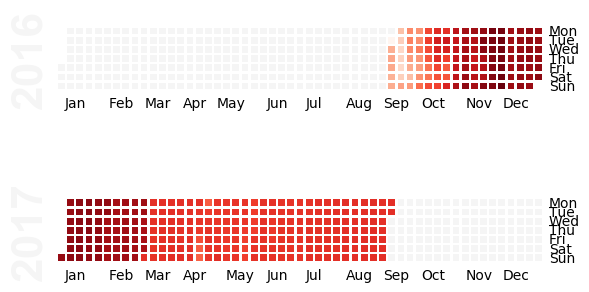

In [391]:
%matplotlib inline
import calmap
calmap.calendarplot(mean_avail)

C:\Users\Stace\Anaconda3\lib\site-packages\calmap\__init__.py:294: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()



(<matplotlib.figure.Figure at 0x223b27660f0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000223B2DB5DA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000223C0D998D0>], dtype=object))

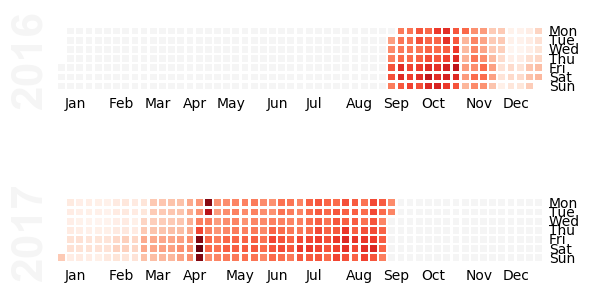

In [392]:
mean_filled_price = com_calendar.groupby('date').modeled_price.mean()
calmap.calendarplot(mean_filled_price)

C:\Users\Stace\Anaconda3\lib\site-packages\calmap\__init__.py:294: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()



(<matplotlib.figure.Figure at 0x223b8b197f0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000223BA1E4E80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000223BA1C93C8>], dtype=object))

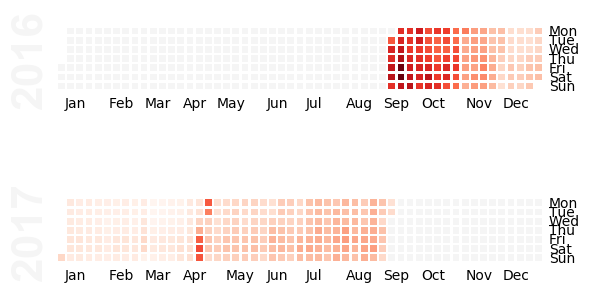

In [393]:
mean_price_available = com_calendar.groupby('date').price.mean()
calmap.calendarplot(mean_price_available)

# Creating Quarterly Revenue

In [394]:
# quarter_dates = ['2016-09-06','2016-12-06','2017-03-06','2017-06-06','2017-07-06']

# quarters = [com_calendar[com_calendar.date.isin(pd.date_range(quarter_dates[n], quarter_dates[n+1]))] for n in range(4)]
# quarters_revenue = pd.DataFrame(index = pd.Index( com_calendar.listing_id.unique(), name = 'listing_id'))
# quarters_revenue = quarters_revenue.join(listings['host_id'])
# for n,q in enumerate(quarters):
#     quarters_revenue = (quarters_revenue.join(pd.DataFrame(quarters[n].groupby('listing_id').day_revenue.sum()))).rename(columns={'day_revenue':'q'+str(n+1)+'_revenue'})

# del listings['id']


In [395]:


quarter_dates = ['2016-09-06','2016-12-06','2017-03-06','2017-06-06','2017-07-06']

quarters = [calendar[calendar.date.isin(pd.date_range(quarter_dates[n], quarter_dates[n+1]))] for n in range(4)]
quarters_revenue = pd.DataFrame(index = pd.Index(calendar.listing_id.unique(), name = 'listing_id'))
quarters_revenue = quarters_revenue.join(listings['host_id'])
for n,q in enumerate(quarters):
    quarters_revenue = (quarters_revenue.join(pd.DataFrame(quarters[n].groupby('listing_id').day_revenue.sum()))).rename(columns={'day_revenue':'q'+str(n+1)+'_revenue'})

del listings['id']


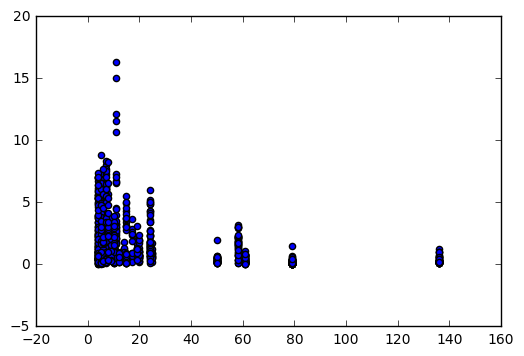

In [432]:
combined_data = quarters_revenue.join(listings, how='left',lsuffix='', rsuffix='_lis')
#combined_data = combined_data[combined_data['reviews_per_month'] > 3]
combined_data = combined_data[combined_data['calculated_host_listings_count'] > 3]
plt.scatter(combined_data['calculated_host_listings_count'], combined_data['reviews_per_month'])

In [462]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split



analysis_data = pd.DataFrame(combined_data, columns=['q1_revenue','number_of_reviews','number_of_reviews', 'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value'])
analysis_data.dropna(inplace=True)

analysis_data_y = (analysis_data['q1_revenue']).copy()
#withholding 'number_of_reviews_'
analysis_data_x = analysis_data[['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value']].copy()

In [481]:
#Divided the review_scores_rating by 100 to normalize
analysis_data_x['review_scores_rating'] = analysis_data_x['review_scores_rating'] / 10
analysis_data['q1_revenue'] = analysis_data['q1_revenue'].apply(lambda x: math.log(x+1))
#Propensity for columns to replicate- this deals with that issue
analysis_data_x = analysis_data_x.loc[:,~analysis_data_x.columns.duplicated()]
reg = linear_model.LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(analysis_data_x, analysis_data_y, test_size = 0.2, random_state = 4)
y_train.shape
output = reg.fit(x_train,y_train)
output.coef_
predicted_answers = reg.predict(x_test)
predicted_answers[0]
y_test.iloc[2]
#mean-squared error
np.mean((predicted_answers-y_test)**2)

9273.2052191997936

In [378]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('q1_revenue ~  review_scores_location  +  review_scores_checkin  + review_scores_cleanliness + review_scores_communication + review_scores_value + review_scores_rating + review_scores_accuracy', data=analysis_data).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             q1_revenue   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     7.284
Date:                Sun, 23 Apr 2017   Prob (F-statistic):           1.56e-08
Time:                        11:50:06   Log-Likelihood:                -10067.
No. Observations:                 989   AIC:                         2.015e+04
Df Residuals:                     981   BIC:                         2.019e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept         

(0.0001, 0.31622776601683794)

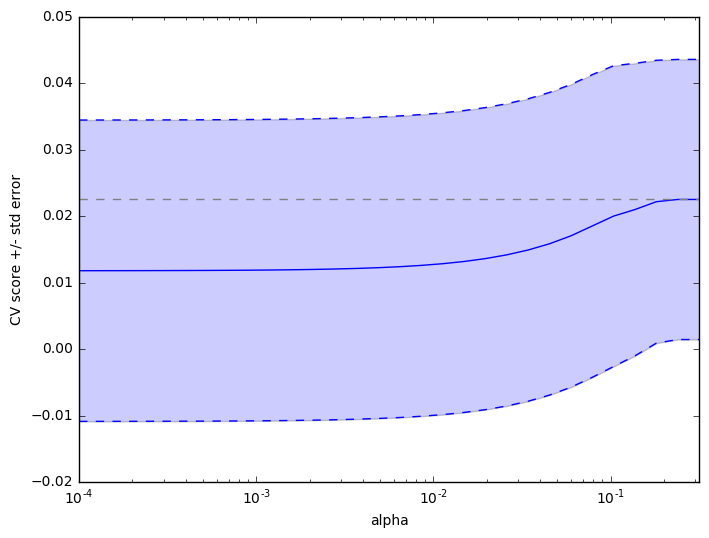

In [485]:
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#data x_train, y_train

lasso = Lasso(random_state=4)
alphas = np.logspace(-4, -0.5, 30)

scores = list()
scores_std = list()

n_folds = 3

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_val_score(lasso, x_train, y_train, cv=n_folds, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

scores, scores_std = np.array(scores), np.array(scores_std)

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

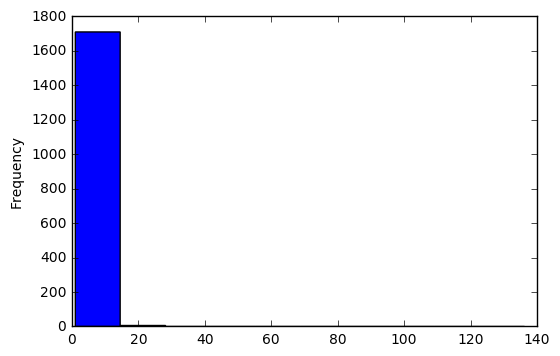

In [380]:
listings.host_id.value_counts().plot(kind='hist')

In [435]:
Lasso(alpha = 1.0, fit_intercept = True, normalize = False, precompute = False, copy

In [448]:
from sklearn.linear_model import LassoLarsCV
#def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
lassoreg.fit(x_train,y_train)
y_pred = lassoreg.predict(x_train)
    
    #Check if a plot is to be made for the entered alpha
#if alpha in models_to_plot:
#    plt.subplot(models_to_plot[alpha])
#    plt.tight_layout()
#    plt.plot(data['x'],y_pred)
#    plt.plot(data['x'],data['y'],'.')
#    plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
rss = sum((y_pred-y_train)**2)
ret = [rss]
ret.extend([lassoreg.intercept_])
ret.extend(lassoreg.coef_)
print(ret)



[128340727658.78847, -9122.0953663119217, 43.363834909652468, 301.89689962885507, 633.29640856810056, -40.734382997762324, 152.62334465062378, 784.48038312377764, -602.62920955934612]


training data MSE
39391950.763
test data MSE
53169785.0558
training data R-square
0.0482692368385
test data R-square
0.0379702989042
Features Most Significant
{'review_scores_rating': 0.0, 'review_scores_value': -556.4643102698891, 'review_scores_cleanliness': 832.01078421536454, 'review_scores_accuracy': 192.82009589108128, 'review_scores_checkin': 0.0, 'review_scores_location': 633.7318341128198, 'review_scores_communication': 348.43667460825645}


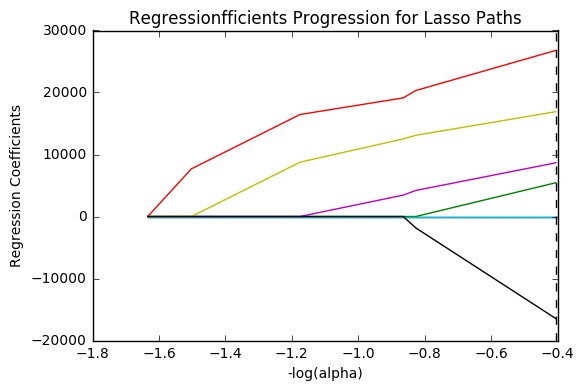

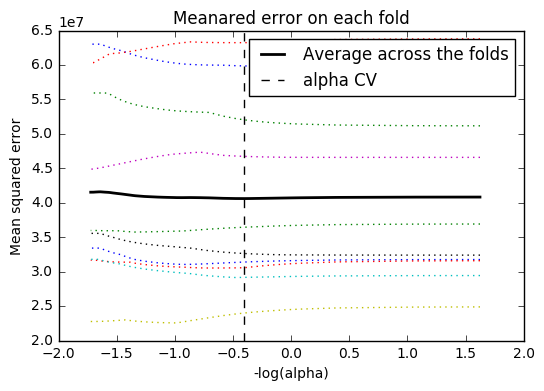

In [478]:
from sklearn.linear_model import LassoLarsCV
# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(x_train,y_train)
# print variable names and regression coefficients
#dict creates a dictionary object, zip creates a list
coefficients = dict(zip(x_train.columns, model.coef_))
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
 label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regressionfficients Progression for Lasso Paths')
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
 label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
 label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Meanared error on each fold')
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(y_train, model.predict(x_train))
test_error = mean_squared_error(y_test, model.predict(x_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)
# R-square from training and test data
rsquared_train=model.score(x_train,y_train)
rsquared_test=model.score(x_test,y_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)
print('Features Most Significant')
print(coefficients)
#ASSISTANCE FROM: https://cognosworld.wordpress.com/2016/02/15/machine-learning-lasso-regression-using-python/

# CLEANED REGRESSION OUTPUTS

In [708]:
#IMPORTS
import numpy as np
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

listings = pd.read_pickle('data/listings_cleaned.pkl')
#listings['analysis_table'] = listings.index
#listings['analysis_table'] = pd.DataFrame(listings.analysis_table.map(lambda x: amn_frame.loc[x]))
analysis_table = pd.merge(listings, amn_frame, left_index=True, right_index=True)
analysis_table.columns

Index(['host_id', 'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'amenities',
       'listed_price', 'cleaning_fee', 'number_of_reviews', 'first_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'Carbon Monoxide Detector', 'Doorman', 'Dogs',
       'Air Conditioning', 'Suitable for Events', 'Breakfast',
       'Wheelchair Accessible', 'Cable TV', 'First Aid Kit', 'Hot Tub',
       'Paid Parking Off Premises', 'Indoor Fireplace', 'TV', 'Iron', 'Pool',
       'Smoking Allowed', 'Shampoo', 'Other pets', 'Wireless Internet',
       'Internet', 'Buzzer/Wireless Intercom', 'Laptop Friendly Workspace',
       'Pets live on this property',
       'translation missing enhosting_amenity_

In [709]:
analysis_table = pd.merge(analysis_table, pd.get_dummies(analysis_table.room_type), left_index = True, right_index = True)
analysis_table = pd.merge(analysis_table, pd.get_dummies(analysis_table.neighbourhood_cleansed), left_index = True, right_index = True)
analysis_table = pd.merge(analysis_table, pd.get_dummies(analysis_table.property_type), left_index = True, right_index = True)

In [711]:
cols_to_remove = ['host_id','zipcode','neighbourhood_cleansed', 'latitude', 'longitude', 'amenities', 'first_review', 'room_type','property_type', 'listed_price', 'Carbon Monoxide Detector', 'Entire home/apt','Allston','Apartment']
analysis_table['cleaning_fee'] = (analysis_table.cleaning_fee > 0)
#(pd.DataFrame(analysis_table.columns)).to_csv('analysis_table_columns.csv')
for i in cols_to_remove:
    del analysis_table[i]

In [712]:
analysis_table.columns

Index(['accommodates', 'bathrooms', 'cleaning_fee', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'Doorman', 'Dogs', 'Air Conditioning',
       'Suitable for Events', 'Breakfast', 'Wheelchair Accessible', 'Cable TV',
       'First Aid Kit', 'Hot Tub', 'Paid Parking Off Premises',
       'Indoor Fireplace', 'TV', 'Iron', 'Pool', 'Smoking Allowed', 'Shampoo',
       'Other pets', 'Wireless Internet', 'Internet',
       'Buzzer/Wireless Intercom', 'Laptop Friendly Workspace',
       'Pets live on this property',
       'translation missing enhosting_amenity_50', 'Free Parking on Premises',
       'Safety Card', 'Dryer', 'Kitchen', 'Washer', 'Hangers',
       'Elevator in Building', 'Hair Dryer', 'Free Parking on Street',
       'Washer / Dryer'

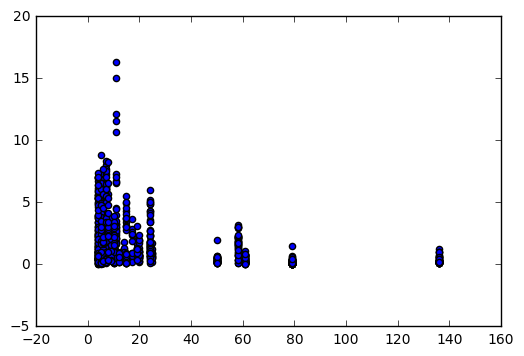

In [725]:
combined_data = quarters_revenue.join(analysis_table, how='left',lsuffix='', rsuffix='_lis')
#combined_data = combined_data[combined_data['reviews_per_month'] > 3]
combined_data = combined_data[combined_data['calculated_host_listings_count'] > 3]
plt.scatter(combined_data['calculated_host_listings_count'], combined_data['reviews_per_month'])

analysis_data = pd.DataFrame(combined_data)#, columns=['q1_revenue','number_of_reviews','number_of_reviews', 'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value'])
analysis_data.dropna(inplace=True)

analysis_data_y = (analysis_data['q1_revenue'].apply(lambda x: math.log(x + 1))).copy()
#withholding 'number_of_reviews_'
analysis_data_x = analysis_data.copy()
del analysis_data_x['q1_revenue']
del analysis_data_x['q2_revenue']
del analysis_data_x['q3_revenue']
del analysis_data_x['q4_revenue']

In [722]:
#Divided the review_scores_rating by 100 to normalize
analysis_data_x['review_scores_rating'] = analysis_data_x['review_scores_rating'] / 10
analysis_data['q1_revenue'] = analysis_data['q1_revenue'].apply(lambda x: math.log(x+1))
#Propensity for columns to replicate- this deals with that issue
analysis_data_x = analysis_data_x.loc[:,~analysis_data_x.columns.duplicated()]
reg = linear_model.LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(analysis_data_x, analysis_data_y, test_size = 0.2, random_state = 4)
y_train.shape
output = reg.fit(x_train,y_train)
output.coef_
predicted_answers = reg.predict(x_test)
predicted_answers[0]
y_test.iloc[2]
#mean-squared error
np.mean((predicted_answers-y_test)**2)

3.476873498153457

In [715]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('q1_revenue ~  review_scores_location  +  review_scores_checkin  + review_scores_cleanliness + review_scores_communication + review_scores_value + review_scores_rating + review_scores_accuracy', data=analysis_data).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             q1_revenue   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     6.602
Date:                Sun, 23 Apr 2017   Prob (F-statistic):           1.29e-07
Time:                        18:51:45   Log-Likelihood:                -1928.5
No. Observations:                 857   AIC:                             3873.
Df Residuals:                     849   BIC:                             3911.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept         

training data MSE
3.51761271289
test data MSE
3.32812574954
training data R-square
0.383926671896
test data R-square
0.351370595259
Features Most Significant


,coefficient_name,estimated_value
25,Mattapan,1.429681
19,Wireless Internet,1.217450
6,Downtown,0.761073
50,Air Conditioning,0.760711
80,Kitchen,0.666860
96,Townhouse,0.587524
75,Back Bay,0.499099
81,South End,0.448210
31,Washer,0.431704
84,Roxbury,0.383334


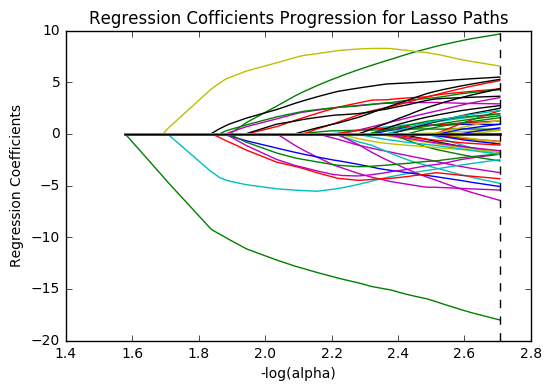

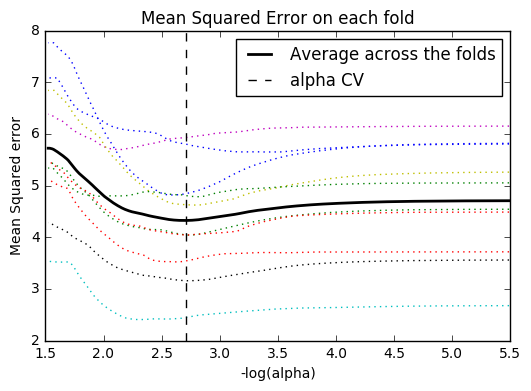

In [771]:
from sklearn.linear_model import LassoLarsCV
# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(x_train,y_train)
# print variable names and regression coefficients
#dict creates a dictionary object, zip creates a list
coefficients = dict(zip(x_train.columns, model.coef_))
coefficients_results = pd.DataFrame([(key, val) for (key, val) in coefficients.items()], columns = ['coefficient_name','estimated_value'])
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
 label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Cofficients Progression for Lasso Paths')
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
 label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
 label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean Squared error')
plt.title('Mean Squared Error on each fold')
# MSE from training and test data

train_error = mean_squared_error(y_train, model.predict(x_train))
test_error = mean_squared_error(y_test, model.predict(x_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)
# R-square from training and test data
rsquared_train=model.score(x_train,y_train)
rsquared_test=model.score(x_test,y_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)
print('Features Most Significant')
coefficients_results[coefficients_results['estimated_value'] != 0].sort_values('estimated_value', ascending = False)
#ASSISTANCE FROM: https://cognosworld.wordpress.com/2016/02/15/machine-learning-lasso-regression-using-python/

In [767]:
coefficients.values()




,coefficient_name,estimated_value
0,review_scores_rating,0.015275
1,Fenway,-0.255256
4,Breakfast,0.114662
6,Downtown,0.761073
7,Mission Hill,0.284341
8,Cable TV,0.106335
11,Dogs,-0.896508
18,Pool,0.315056
19,Wireless Internet,1.217450
21,Other pets,-1.227264
